In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [7]:
sns.set_style('darkgrid')
sns.set_context('poster', font_scale=1.6)

We want to investigate the problem from Newton's Universal Arithmetick: "A stone falling down into a well, from the sound of the stone striking the bottom, to determine the depth of the well". 

In [8]:
v_sound = 340.29      # m/s
g = 9.81              # m/s^2

def signaltime(depth):
    return falltime(depth) + soundtime(depth)

def falltime(depth):
    return math.sqrt(2 * depth / g)

def soundtime(depth):
    return depth / v_sound

In [9]:
xs = np.linspace(0, 100, 101)
ys = map(signaltime, xs)
zs = map(falltime, xs)

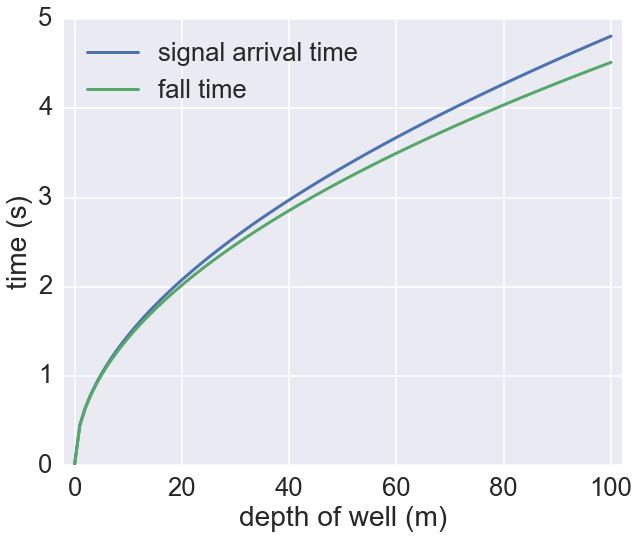

In [10]:
fig, ax = plt.subplots(1, figsize=(10, 8), facecolor=(1,1,1))
ax.plot(xs, ys, lw=3, label='signal arrival time')
ax.plot(xs, zs, lw=3, label='fall time')
ax.set_xlim((-2, 102))
ax.set_xlabel('depth of well (m)')
ax.set_ylabel('time (s)')
ax.legend(loc=0)

But we neglected drag! Drag is a force that we can assume here to be proportional to the square of the velocity. For a small rock, here are some reasonable parameters.

In [12]:
dragcoeff = .00375

ts = np.linspace(0, 10, 101)
vs_nodrag = g * ts
vs = np.zeros(101)
xs_drag = np.zeros(101)
v_curr = vs[0]
x_curr = xs_drag[0]
for ii in range(1, 101):
    fac = g - dragcoeff * v_curr**2
    v_curr = v_curr + fac*0.1
    x_curr = x_curr + v_curr*0.1
    vs[ii] = v_curr
    xs_drag[ii] = x_curr

Falling with drag: The velocity approaches a terminal velocity (here about 50 m/s).

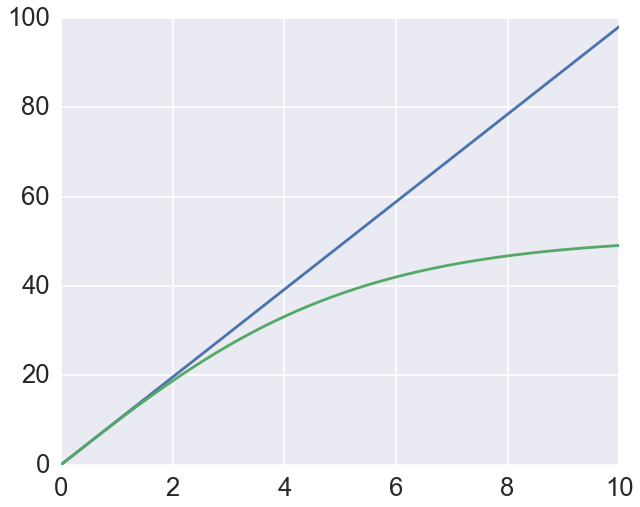

In [13]:
fig, ax = plt.subplots(1, figsize=(10, 8), facecolor=(1,1,1))
ax.plot(ts, vs_nodrag)
ax.plot(ts, vs)

To get signal arrival times, we still need to add the travel time of the sound signal.

In [14]:
ts_return = ts + map(soundtime, xs_drag)

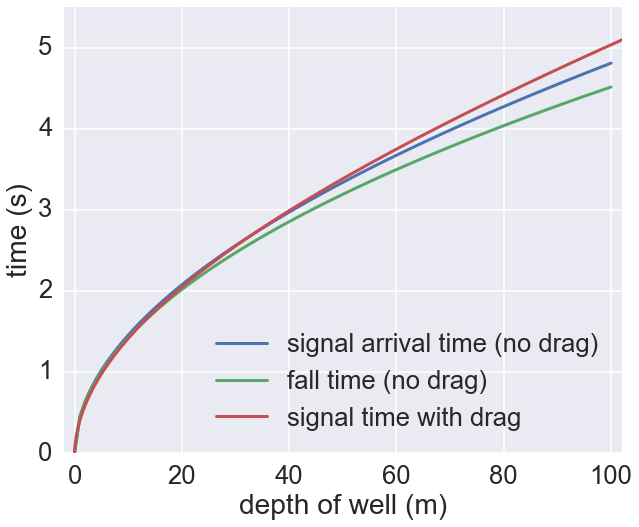

In [15]:
fig, ax = plt.subplots(1, figsize=(10, 8), facecolor=(1,1,1))
ax.plot(xs, ys, lw=3, label='signal arrival time (no drag)')
ax.plot(xs, zs, lw=3, label='fall time (no drag)')
ax.plot(xs_drag, ts_return, lw=3, label='signal time with drag')
ax.set_xlim((-2, 102))
ax.set_ylim((0, 5.5))
ax.set_xlabel('depth of well (m)')
ax.set_ylabel('time (s)')
ax.legend(loc=0)

Let's find a good test value! Which return time in the "true" phsical system (with drag) corresponds to about 50 m well depth?

In [20]:
idx = (np.abs(xs_drag-48.9)).argmin()
print(idx, xs_drag[idx], ts[idx])

(32, 48.913105554322954, 3.2000000000000002)


In [21]:
true_depth = 48.9
idx0 = 32

In [23]:
t_sample = 0.2 * np.random.randn(10) + 3.2

In [24]:
t_sample

array([ 3.05660087,  3.15594672,  3.49145981,  3.28174287,  3.27922198,
        2.99264843,  3.72328935,  3.49741385,  3.37866665,  3.69161608])

In [27]:
sigsq_d = np.var(t_sample)
sigsq_d

0.055948215845520198

In [28]:
sigsq_m = 1

In [ ]:
F_misfit = 